In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_to_file = 'C:/Users/olran/OneDrive/Робочий стіл/КопіяTest2.xlsx'
file = pd.ExcelFile(path_to_file)
file.sheet_names

['Intro', 'task1', 'task2', 'task3', 'task4', 'task5']

In [4]:
task4_df1 = file.parse('task4')
task4_df1

,Site,Customer ID,Month (Registration),Month (pay),Campaign Name,Count,Total sum UAH
0,Site_1,1,2019-03-01,2019-03-01,Campaign_2,1,87.61
1,Site_1,2,2019-07-01,2019-07-01,Campaign_2,3,987.24
2,Site_1,2,2019-07-01,2019-08-01,Campaign_2,6,2012.56
3,Site_1,3,2019-02-01,2019-02-01,Campaign_2,1,68.55
4,Site_1,4,2019-10-01,2019-10-01,Campaign_2,2,122.72
...,...,...,...,...,...,...,...
40452,Site_1,40213,2019-10-01,2019-10-01,Campaign_1,1,148.34
40453,Site_1,40214,2019-10-01,2019-10-01,Campaign_3,2,1153.73
40454,Site_1,40215,2019-10-01,2019-10-01,Campaign_1,2,247.32
40455,Site_1,40216,2019-10-01,2019-10-01,Campaign_1,1,164.82


In [10]:
task4_df1['Campaign Name'].sort_values().unique()

array(['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4',
       'Campaign_5', 'Campaign_6', 'Campaign_7'], dtype=object)

In [11]:
task4_df1['Total sum UAH'].sum()

44932233.08

In [12]:
# Рахуємо к-ть кожної з кампаній що працює
task4_df1['Campaign Name'].value_counts()

Campaign_1    10537
Campaign_2     7400
Campaign_3     6820
Campaign_4     6814
Campaign_5     3247
Campaign_6     3189
Campaign_7     2450
Name: Campaign Name, dtype: int64

In [13]:
# Перевірка, яка з кампаній приносить більший дохід
task4_df1.groupby('Campaign Name')['Total sum UAH'].sum()

Campaign Name
Campaign_1    13572479.77
Campaign_2     8940193.73
Campaign_3     6487627.31
Campaign_4     5426993.22
Campaign_5     2864743.86
Campaign_6     4362142.66
Campaign_7     3278052.53
Name: Total sum UAH, dtype: float64

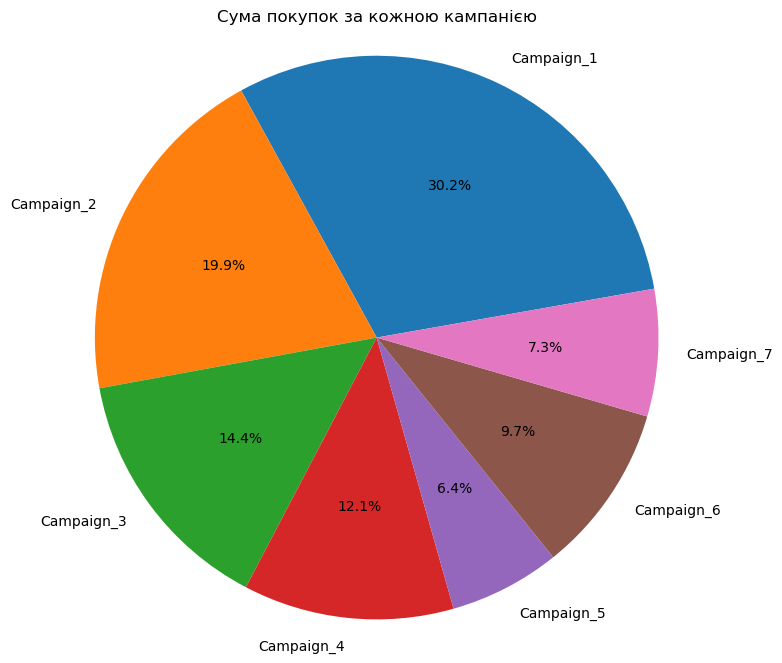

In [16]:
purchase_sum = task4_df1.groupby('Campaign Name')['Total sum UAH'].sum()

plt.figure(figsize=(8, 8))
plt.pie(purchase_sum, labels=purchase_sum.index, autopct='%1.1f%%', startangle=1450)
plt.axis('equal')  
plt.title('Сума покупок за кожною кампанією')
plt.show()

In [14]:
count_by_campaign = task4_df1['Campaign Name'].value_counts()
sum_by_campaign = task4_df1.groupby('Campaign Name')['Total sum UAH'].sum()
result_df = pd.DataFrame({'Count': count_by_campaign, 'Total Sum UAH': sum_by_campaign})
result_df['Average Order Value'] = result_df['Total Sum UAH'] / result_df['Count']
result_df

,Count,Total Sum UAH,Average Order Value
Campaign_1,10537,13572479.77,1288.078179
Campaign_2,7400,8940193.73,1208.134288
Campaign_3,6820,6487627.31,951.265001
Campaign_4,6814,5426993.22,796.447493
Campaign_5,3247,2864743.86,882.274056
Campaign_6,3189,4362142.66,1367.871640
Campaign_7,2450,3278052.53,1337.980624


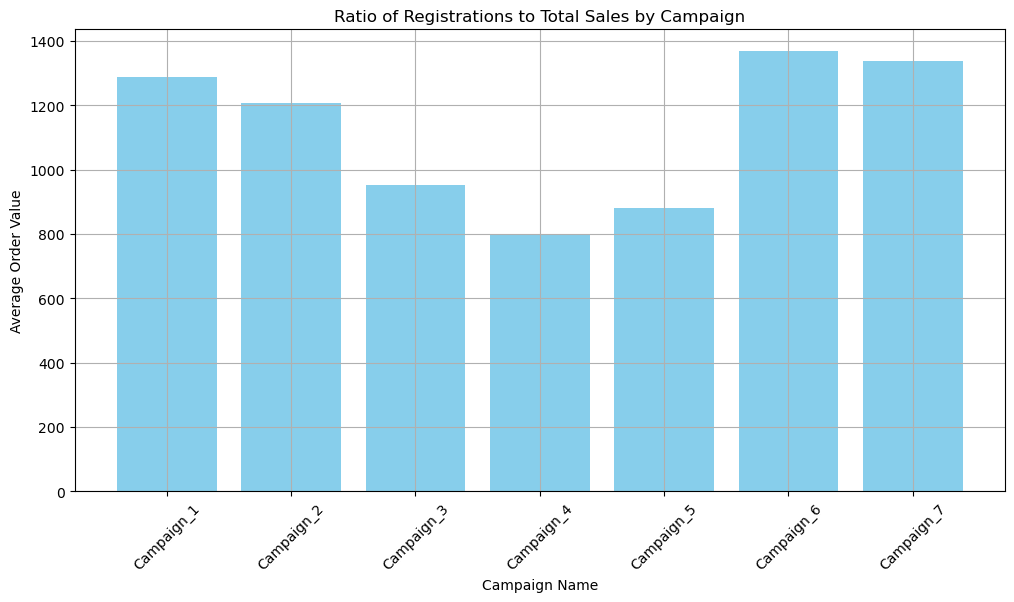

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(result_df.index,  result_df['Total Sum UAH'] /result_df['Count'], color='skyblue')

plt.xticks(result_df.index, result_df.index, rotation=45)
plt.xlabel('Campaign Name')
plt.ylabel('Average Order Value')
plt.title('Ratio of Registrations to Total Sales by Campaign')
plt.grid(linestyle='-')

plt.show()

In [15]:
task4_df1.groupby('Campaign Name')['Total sum UAH'].describe()

,count,mean,std,min,25%,50%,75%,max
Campaign Name,,,,,,,,
Campaign_1,10537.0,1288.078179,5533.564307,3.29,87.1100,255.160,700.9000,166132.00
Campaign_2,7400.0,1208.134288,6626.845274,49.92,115.4875,303.730,690.4300,339050.63
Campaign_3,6820.0,951.265001,5957.073010,11.68,84.6700,171.030,499.9750,271132.78
Campaign_4,6814.0,796.447493,3264.828181,49.99,85.7600,172.265,511.0575,106055.37
Campaign_5,3247.0,882.274056,3088.853929,50.00,87.8800,241.890,592.2850,63890.48
Campaign_6,3189.0,1367.871640,8838.175452,23.12,87.0500,256.210,688.2300,310560.62
Campaign_7,2450.0,1337.980624,5701.847288,33.33,135.2000,328.710,849.8825,145791.06


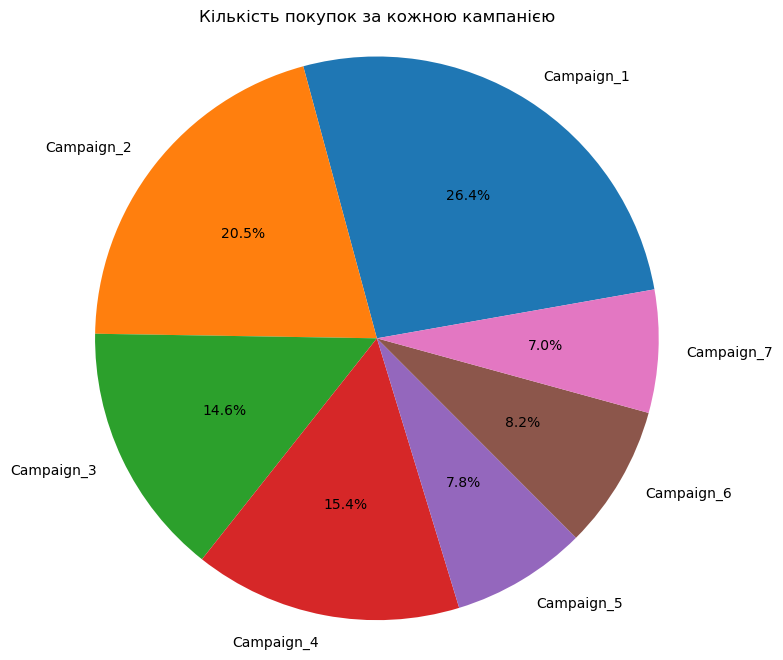

In [32]:
purchase_counts = task4_df1.groupby('Campaign Name')['Count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=1450)
plt.axis('equal')  
plt.title('Кількість покупок за кожною кампанією')
plt.show()

In [34]:
count_by_campaign = task4_df1['Campaign Name'].value_counts()
sum_by_purchase_counts = task4_df1.groupby('Campaign Name')['Count'].sum()
average_value = sum_by_purchase_counts/count_by_campaign
result_df1 = pd.DataFrame({'Count of campaign': count_by_campaign, 'Purchase count': sum_by_purchase_counts})
result_df1['Average Value'] = result_df1['Purchase count'] / result_df1['Count of campaign']
result_df1

,Count of campaign,Purchase count,Average Value
Campaign_1,10537,36684,3.481446
Campaign_2,7400,28502,3.851622
Campaign_3,6820,20267,2.971701
Campaign_4,6814,21337,3.131347
Campaign_5,3247,10788,3.322451
Campaign_6,3189,11447,3.589526
Campaign_7,2450,9775,3.989796


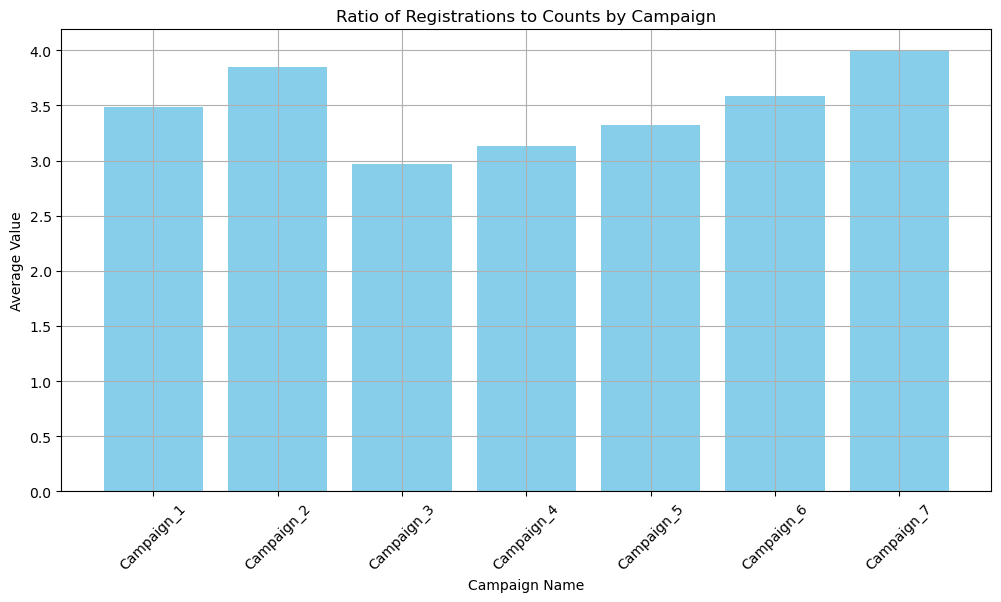

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(result_df1.index,  result_df1['Average Value'], color='skyblue')

plt.xticks(result_df1.index, result_df1.index, rotation=45)
plt.xlabel('Campaign Name')
plt.ylabel('Average Value')
plt.title('Ratio of Registrations to Counts by Campaign')
plt.grid(linestyle='-')

plt.show()

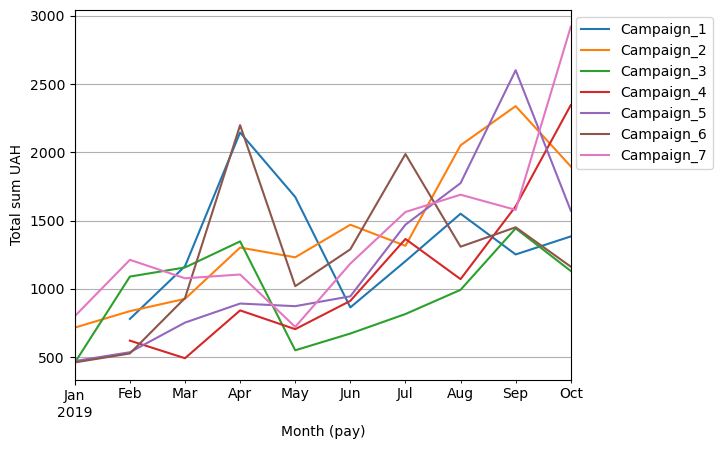

In [12]:
# Прибуток для кожного місяця кожної з кампаній
total_sum_month = pd.pivot_table(task4_df1, values='Total sum UAH', index='Month (pay)', columns='Campaign Name')
ax = total_sum_month.plot()
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1));
ax.set_ylabel('Total sum UAH')
ax.grid()

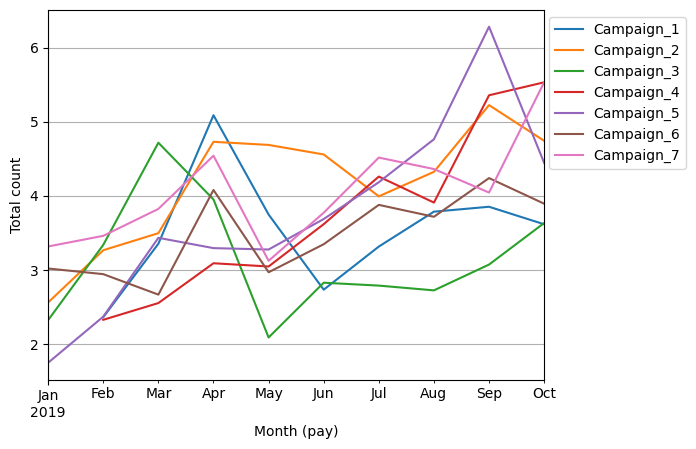

In [40]:
# Кількість покупок для кожного місяці кожної з кампаній
total_count_month = pd.pivot_table(task4_df1, values='Count', index='Month (pay)', columns='Campaign Name')
ax = total_count_month.plot()
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1));
ax.set_ylabel('Total count')
ax.grid()

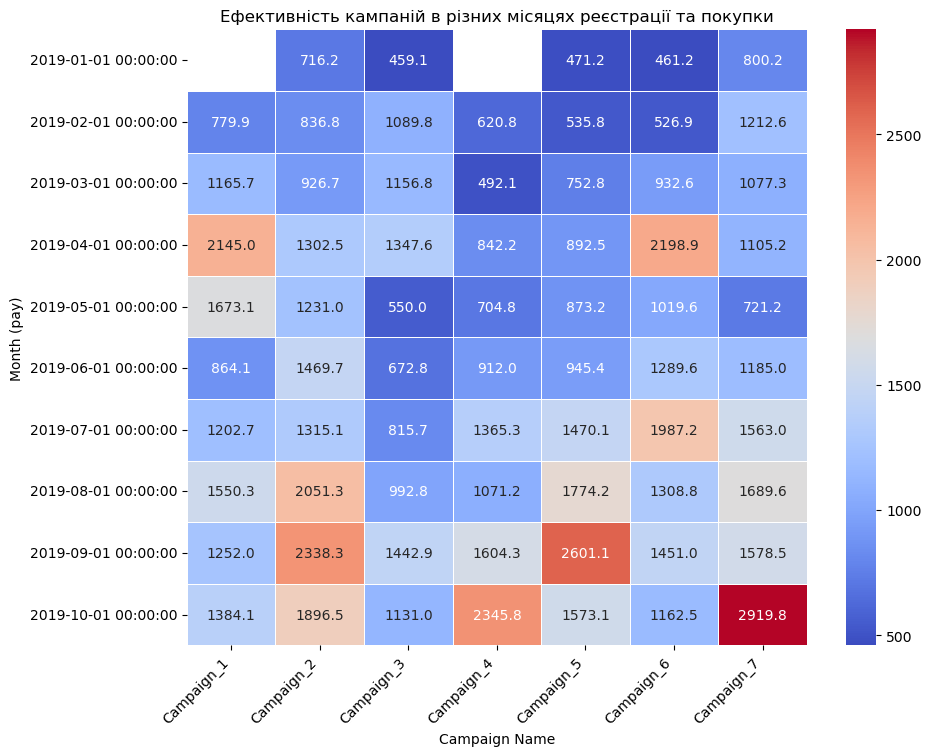

In [15]:
pivot_table = pd.pivot_table(task4_df1, values='Total sum UAH', index='Month (pay)', columns='Campaign Name')
months = pivot_table.index
campaigns = pivot_table.columns

# Створення теплової карти
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

# Додавання назв місяців
heatmap.set_yticklabels(months, rotation=0)
heatmap.set_xticklabels(campaigns, rotation=45, ha='right')

plt.xlabel('Campaign Name')
plt.ylabel('Month (pay)')
plt.title('Ефективність кампаній в різних місяцях покупки по прибутку')

plt.show()

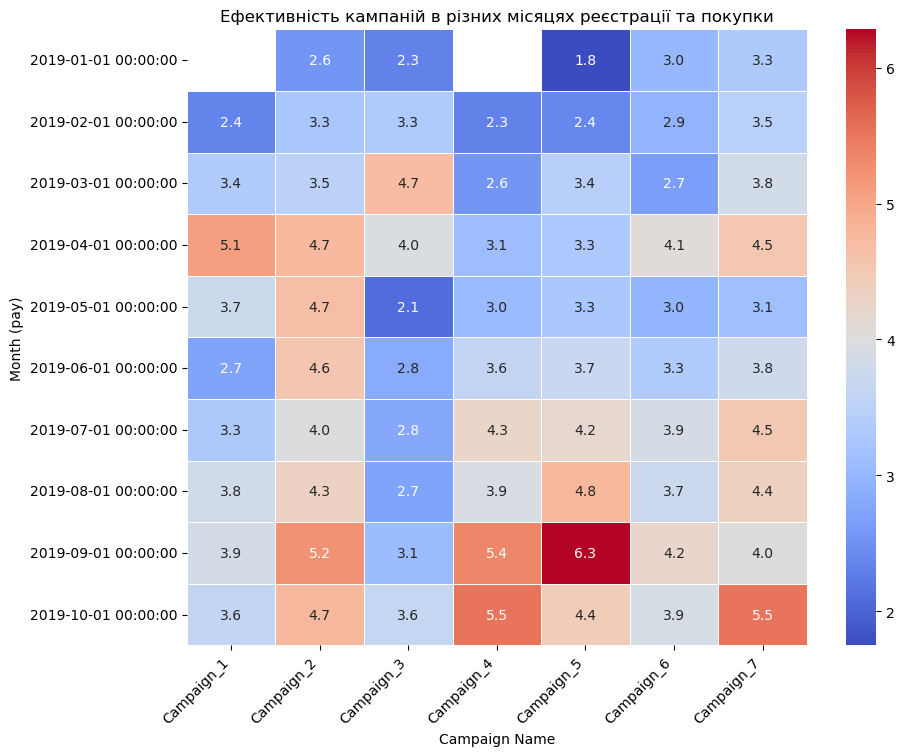

In [18]:
pivot_table = pd.pivot_table(task4_df1, values='Count', index='Month (pay)', columns='Campaign Name')
months = pivot_table.index
campaigns = pivot_table.columns

# Створення теплової карти
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

# Додавання назв місяців
heatmap.set_yticklabels(months, rotation=0)
heatmap.set_xticklabels(campaigns, rotation=45, ha='right')

plt.xlabel('Campaign Name')
plt.ylabel('Month (pay)')
plt.title('Ефективність кампаній в різних місяцях покупки щодо кількості')

plt.show()